### This code is to use the lmfit package with the stack code



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import lmfit

In [3]:
import admittance

In [4]:
n_glass = admittance.nk_code.constant_n(1.45)
admittance.nk['glass'] = n_glass
admittance.nk['lossy_glass'] = admittance.nk_code.constant_n(1.45-0.1j)


In [5]:
layers = lmfit.Parameters()

In [6]:
stack_description = ['air',
                     #'SiO2_Metricon',
                     #'aSi_Metricon',
                     'glass',
                     'lossy_glass',
                     'air',
                    ]
idx = 0
for name in stack_description:
    if (idx==0):
        p = lmfit.Parameter(f'layer{idx}', value=np.inf, min=100, max=np.inf, user_data={'name':name})
        p.vary = False
    elif (idx==(len(stack_description)-1)):
        p = lmfit.Parameter(f'layer{idx}', value=np.inf, min=100, max=np.inf, user_data={'name':name})
        p.vary = False
    else:
        p = lmfit.Parameter(f'layer{idx}', value=200, min=1, max=3000, user_data={'name':name})
    layers.add(p)
    idx +=1

In [7]:
layers

name,value,initial value,min,max,vary
layer0,inf,inf,100.000000,inf,False
layer1,200.000000,200,1.00000000,3000.00000,True
layer2,200.000000,200,1.00000000,3000.00000,True
layer3,inf,inf,100.000000,inf,False


In [8]:
t = []
for key in layers.keys():
    t.append(layers[key].value)
t

[inf, 200, 200, inf]

In [9]:
r = admittance.stack_v2(stack_description, t, np.array([1000, 1550]))
r['vac_lambdas'], r['RAT'], 

(array([1000, 1550]),
 array([[0.04888653, 0.        , 0.2088296 , 0.74228387],
        [0.03615137, 0.        , 0.15911632, 0.8047323 ]]))

In [10]:
def layers2t(layers):
    t = []
    for key in layers.keys():
        t.append(layers[key].value)
    return t
def min_r(layers):
    t = []
    for key in layers.keys():
        t.append(layers[key].value)
    r = admittance.stack_v2(stack_description, t, np.array([1000, 1550]))
    error = r['RAT'][:,0].sum()
    return error

In [11]:
min_r(layers)

0.0850379038443091

In [12]:
results = lmfit.minimize(min_r, layers, method='dual_annealing')

In [13]:
min_r(results.params), results.params

(0.0009290249207156013,
 Parameters([('layer0',
              <Parameter 'layer0', value=inf (fixed), bounds=[100:inf]>),
             ('layer1',
              <Parameter 'layer1', value=758.1957492552499, bounds=[1:3000]>),
             ('layer2',
              <Parameter 'layer2', value=273.64147525568467, bounds=[1:3000]>),
             ('layer3',
              <Parameter 'layer3', value=inf (fixed), bounds=[100:inf]>)]))

In [14]:
results.params, layers2t(results.params)

(Parameters([('layer0',
              <Parameter 'layer0', value=inf (fixed), bounds=[100:inf]>),
             ('layer1',
              <Parameter 'layer1', value=758.1957492552499, bounds=[1:3000]>),
             ('layer2',
              <Parameter 'layer2', value=273.64147525568467, bounds=[1:3000]>),
             ('layer3',
              <Parameter 'layer3', value=inf (fixed), bounds=[100:inf]>)]),
 [inf, 758.1957492552499, 273.64147525568467, inf])

In [15]:
admittance.stack_v2(stack_description, layers2t(results.params), np.array([1000, 1550]))


{'stack_nk': array([[1.  +0.j , 1.45+0.j , 1.45-0.1j, 1.  +0.j ],
        [1.  +0.j , 1.45+0.j , 1.45-0.1j, 1.  +0.j ]]),
 'vac_lambdas': array([1000, 1550]),
 'RAT': array([[3.97383957e-04, 0.00000000e+00, 2.88252763e-01, 7.11349853e-01],
        [5.31640964e-04, 0.00000000e+00, 2.01226935e-01, 7.98241424e-01]])}

# Try with tungsten layer a 1064nm

In [33]:
stack_description=['air', 
                   'SiO2_Metricon',
                   'aSi_190312',
                   'W_trilayer_29',
                   'aSi_Metricon',
                   'Au_Palik',
                   'air'
                  ]
init_guess = [np.inf,
              140.95,
              36.26,
              20,
              69.62,
              20,
             np.inf]

import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox, Layout

vary_gui = []
labels_gui = []
guess_gui = []
idx = 1  # skip incoming index
while idx < len(stack_description)-1:  # skip output index
    name = stack_description[idx]
    guess = init_guess[idx]
    cb = widgets.Checkbox(
        value=False,
        description=f'vary:',
        disabled=False,
        indent=False
    )
#     label = widgets.Text(
#         value=f'layer: {name} init: {guess}',
#         #placeholder='Type something',
#         #description='String:',
#         disabled=True
#     )  
    label = widgets.Label(f'{name}')
    guess_widget = widgets.BoundedFloatText(
        value=guess,
        min=1,
        #max=np.inf,
        #step=0.1,
        #description=f'{name}:',
        disabled=False,
        layout=Layout(width='150px')
    )
    
    #print(name, guess)
    idx += 1
    vary_gui.append(cb)
    labels_gui.append(label)
    #labels_gui.append(HBox([label, guess_widget])
    guess_gui.append(guess_widget)
label_box = VBox(labels_gui)
guess_box = VBox(guess_gui)
vary_box = VBox(vary_gui)
stack_gui = HBox([label_box, guess_box, vary_box])

In [35]:
stack_gui

In [36]:
layers = lmfit.Parameters()
idx = 0

name = 'air'
p = lmfit.Parameter(f'layer{idx}', value=np.inf, min=1, max=np.inf, user_data={'name':name})
p.vary = False
layers.add(p)

while idx < len(stack_gui.children[0].children):
    idx += 1
    name = stack_gui.children[0].children[idx-1].value
    t = stack_gui.children[1].children[idx-1].value
    vary = stack_gui.children[2].children[idx-1].value
    p = lmfit.Parameter(f'layer{idx}', value=t, min=0, max=1000, user_data={'name':name})
    p.vary = vary
    layers.add(p)
    print(name, t, vary)

name = 'air'
p = lmfit.Parameter(f'layer{idx+1}', value=np.inf, min=1, max=np.inf, user_data={'name':name})
p.vary = False
layers.add(p)

SiO2_Metricon 100.0 True
aSi_190312 36.26 True
W_trilayer_29 20.0 False
aSi_Metricon 69.62 True
Au_Palik 20.0 False


In [37]:
layers


name,value,initial value,min,max,vary
layer0,inf,inf,1.00000000,inf,False
layer1,100.000000,100.0,0.00000000,1000.00000,True
layer2,36.2600000,36.26,0.00000000,1000.00000,True
layer3,20.0000000,20.0,0.00000000,1000.00000,False
layer4,69.6200000,69.62,0.00000000,1000.00000,True
layer5,20.0000000,20.0,0.00000000,1000.00000,False
layer6,inf,inf,1.00000000,inf,False


In [38]:
admittance.stack_v2(stack_description, layers2t(layers), np.array([1000, 1550]))


{'stack_nk': array([[1.         +0.j        , 1.459299   +0.j        ,
         2.9015615  -0.03206626j, 2.9040652  -4.0768726j ,
         2.79327476 +0.j        , 1.35       -9.58j      ,
         1.         +0.j        ],
        [1.         +0.j        , 1.45265    +0.j        ,
         2.795817   -0.01894686j, 2.8459627  -5.68989795j,
         2.73489277 +0.j        , 1.44      -16.j        ,
         1.         +0.j        ]]),
 'vac_lambdas': array([1000, 1550]),
 'RAT': array([[0.0128723 , 0.        , 0.01902859, 0.91216917, 0.        ,
         0.04714879, 0.00878115],
        [0.23807646, 0.        , 0.0083522 , 0.72915171, 0.        ,
         0.02123761, 0.00318201]])}

In [65]:
def min_r(layers):
    t = []
    for key in layers.keys():
        t.append(layers[key].value)
    wl = np.arange(900, 1101, 25)
    r = admittance.stack_v2(stack_description, t, wl)
    error = ((1-1/r['RAT'][:,3])**2).sum()
    return error

In [66]:
results = lmfit.minimize(min_r, layers, method='dual_annealing')

In [67]:
min_r(results.params), results.params

(0.0768821862224383,
 Parameters([('layer0',
              <Parameter 'layer0', value=inf (fixed), bounds=[1:inf]>),
             ('layer1',
              <Parameter 'layer1', value=121.97037567873464, bounds=[0:1000]>),
             ('layer2',
              <Parameter 'layer2', value=30.85964867402858, bounds=[0:1000]>),
             ('layer3',
              <Parameter 'layer3', value=20.0 (fixed), bounds=[0:1000]>),
             ('layer4',
              <Parameter 'layer4', value=64.41646584993126, bounds=[0:1000]>),
             ('layer5',
              <Parameter 'layer5', value=20.0 (fixed), bounds=[0:1000]>),
             ('layer6',
              <Parameter 'layer6', value=inf (fixed), bounds=[1:inf]>)]))

In [68]:
admittance.stack_v2(stack_description, layers2t(results.params), np.array([1000, 1550]))


{'stack_nk': array([[1.         +0.j        , 1.459299   +0.j        ,
         2.9015615  -0.03206626j, 2.9040652  -4.0768726j ,
         2.79327476 +0.j        , 1.35       -9.58j      ,
         1.         +0.j        ],
        [1.         +0.j        , 1.45265    +0.j        ,
         2.795817   -0.01894686j, 2.8459627  -5.68989795j,
         2.73489277 +0.j        , 1.44      -16.j        ,
         1.         +0.j        ]]),
 'vac_lambdas': array([1000, 1550]),
 'RAT': array([[8.16262648e-04, 0.00000000e+00, 1.68618024e-02, 9.26502374e-01,
         0.00000000e+00, 4.70557411e-02, 8.76381971e-03],
        [2.76706922e-01, 0.00000000e+00, 6.58464012e-03, 6.91939970e-01,
         0.00000000e+00, 2.15409999e-02, 3.22746865e-03]])}

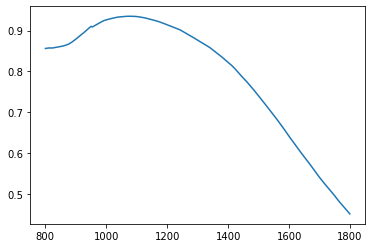

In [69]:
wl = np.arange(800, 1800)
r = admittance.stack_v2(stack_description, layers2t(results.params), wl)
import matplotlib.pyplot as plt
plt.plot(wl, r['RAT'][:,3])


In [62]:
print(layers.pretty_repr())
#p.user_data['name']
from IPython.core.display import display, HTML
display(HTML(layers._repr_html_()))

Parameters({
    'layer0': <Parameter 'layer0', value=inf (fixed), bounds=[1:inf]>, 
    'layer1': <Parameter 'layer1', value=100.0, bounds=[0:1000]>, 
    'layer2': <Parameter 'layer2', value=36.26, bounds=[0:1000]>, 
    'layer3': <Parameter 'layer3', value=20.0 (fixed), bounds=[0:1000]>, 
    'layer4': <Parameter 'layer4', value=69.62, bounds=[0:1000]>, 
    'layer5': <Parameter 'layer5', value=20.0 (fixed), bounds=[0:1000]>, 
    'layer6': <Parameter 'layer6', value=inf (fixed), bounds=[1:inf]>, 
    })



name,value,initial value,min,max,vary
layer0,inf,inf,1.00000000,inf,False
layer1,100.000000,100.0,0.00000000,1000.00000,True
layer2,36.2600000,36.26,0.00000000,1000.00000,True
layer3,20.0000000,20.0,0.00000000,1000.00000,False
layer4,69.6200000,69.62,0.00000000,1000.00000,True
layer5,20.0000000,20.0,0.00000000,1000.00000,False
layer6,inf,inf,1.00000000,inf,False


#  Must have package tmm installed for code below
https://pypi.org/project/tmm/

In [33]:
import tmm

In [ ]:
import numpy as np
result = []
for t in np.arange(1550):
    d_list = [np.inf, t, t, np.inf] #in nm
    n_list = [1, 1.45, 1.45+0.1j, 1]
    th_0=0
    lam_vac=1550
    pol='p'
    coh_tmm_data = tmm.coh_tmm(pol,n_list,d_list,np.array([th_0]),np.array([lam_vac]))
    result.append(coh_tmm_data['R'])

In [ ]:
# subtract results from tmm with results from stack... difference is numerical precision
plt.plot(np.array(result)-np.array(R).ravel())